In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

dataset = pd.read_csv('hotel_bookings.csv')

# Data prepatation
# do not require ['arrival_date_year', 'reservation_status', 
#                 'reservation_status_date','company']
data = dataset.drop(['arrival_date_year', 'reservation_status', 
                  'reservation_status_date','company'], axis=1)

# idfentify which columns must be encoded with dummy variables
variables_to_dummy = []
for col in data.columns:
    if data[col].dtypes != 'int64':
        if data[col].dtypes != 'float64':
            variables_to_dummy.append(col)
            
child_med = data['children'].median() 
data['children'] = data['children'].fillna(value=child_med)

data['agent'] = data['agent'].fillna(value=0)

variables_to_dummy = []
for col in data.columns:
    if data[col].dtypes != 'int64':
        if data[col].dtypes != 'float64':
            variables_to_dummy.append(col)


for var in variables_to_dummy:
    data[var] = pd.get_dummies(data[var])
    
data['adr'] = data['adr'].abs()



In [2]:
data.shape

(119390, 28)

We have 28 features. We want to identify how many features we really need to maximize our accuracy of predicting whether a booking will be cancelled. We will plot the variance explained by 1 to 28 components and find the best number of components required.

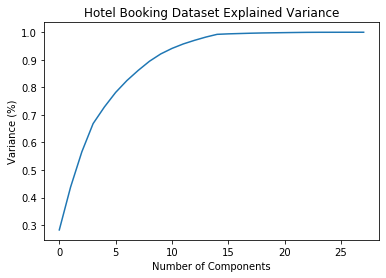

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=[0, 1])
data_rescaled = scaler.fit_transform(data)

#Fitting the PCA algorithm with our Data
pca = PCA().fit(data_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Hotel Booking Dataset Explained Variance')
plt.show()


From our plot, we required approximately 14 components

In [4]:
# normalize data
from sklearn import preprocessing
from sklearn.decomposition import PCA
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

# PCA
pca = PCA(n_components=14)
pca_val = pca.fit_transform(data_scaled)
pca_dataset = pd.DataFrame(pca_val)


X = data.drop(['is_canceled'], axis=1)
Y = data['is_canceled']
print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=66)

(119390, 27)
(119390,)


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression().fit(x_train, y_train)

log_predict = log_model.predict(x_test)

log_accuracy = metrics.accuracy_score(y_test, log_predict)
log_precision = metrics.precision_score(y_test, log_predict)

print("Model's Accuracy: {}  Model's Precision: {}".format(
    round(log_accuracy,4), round(log_precision,4)))

Model's Accuracy: 0.7774  Model's Precision: 0.8538


In [7]:
print(metrics.classification_report(y_test, log_predict))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84     15089
           1       0.85      0.48      0.61      8789

    accuracy                           0.78     23878
   macro avg       0.81      0.71      0.73     23878
weighted avg       0.79      0.78      0.76     23878



We see when we chose 14 principal components, the accuracy and precision when down only by a little. When I chose 20 principal components, the result was the same as 14 components. PCA is not the best approach for this problem.

In [8]:
# Support Vector Machine Model

from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state = 100).fit(x_train, y_train)
svm_predict = svm_model.predict(x_test)


In [9]:
svm_accuracy = metrics.accuracy_score(y_test, svm_predict)
svm_precision = metrics.precision_score(y_test, svm_predict)

print("Model's Accuracy: {}  Model's Precision: {}".format(
    round(svm_accuracy,4), round(svm_precision,4)))


Model's Accuracy: 0.7342  Model's Precision: 0.9685


In [10]:
print(metrics.classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83     15089
           1       0.97      0.29      0.44      8789

    accuracy                           0.73     23878
   macro avg       0.84      0.64      0.63     23878
weighted avg       0.80      0.73      0.68     23878



We want to investigate if PCA had an impact on the SVM model. Once again, there is no significant chance in the accuracy. However, the precision has a significant increase of approxiamtely 11%.